# MNIST

In [2]:
# Import MNIST
from sklearn.datasets import load_digits

In [3]:
# Load dataset
from sklearn.cluster import SpectralClustering
mnist = load_digits()
X = mnist.data
y = mnist.target

## kmeans on MNIST

In [4]:
# Apply kmeans to original MNIST
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(X)
pred_mnist_nr = kmeans.labels_

In [4]:
# Reduce dimensionality of MNIST to 2d for visualizing
import umap
reducer = umap.UMAP()
red = reducer.fit_transform(X)

2023-02-23 15:49:30.309275: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-23 15:49:30.511572: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-23 15:49:30.511586: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-23 15:49:31.183686: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

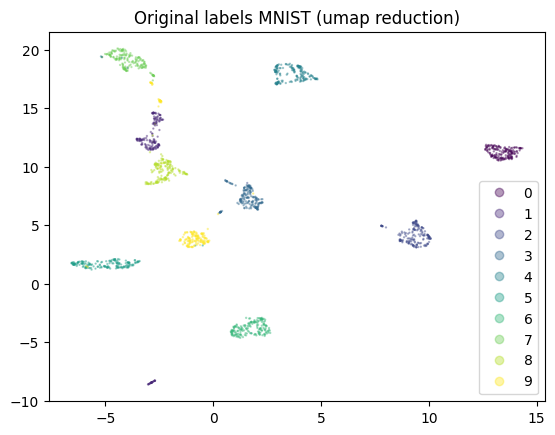

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors

classes = ['0','1','2','3','4','5','6','7','8','9']
scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=y,cmap='viridis')
plt.title("Original labels MNIST (umap reduction)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

In [7]:
# Apply kmeans to reduced MNIST
kmeans = KMeans(n_clusters=10).fit(red)
pred_mnist_r = kmeans.labels_

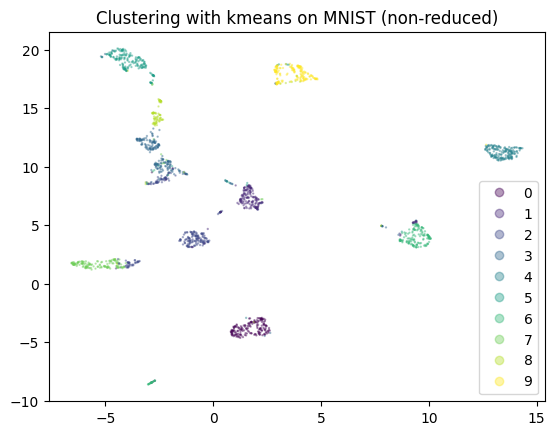

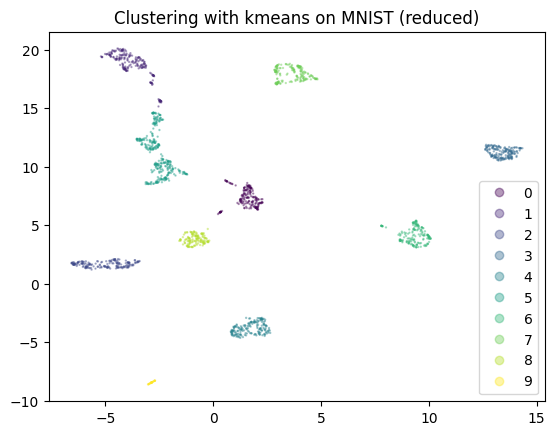

In [8]:
classes = ['0','1','2','3','4','5','6','7','8','9']
scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=pred_mnist_nr,cmap='viridis')
plt.title("Clustering with kmeans on MNIST (non-reduced)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=pred_mnist_r,cmap='viridis')
plt.title("Clustering with kmeans on MNIST (reduced)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

In [9]:
from sklearn.metrics import adjusted_rand_score
print(f'Adjusted rand score for kmeans on non-reduced MNIST: {adjusted_rand_score(y,pred_mnist_nr)}')
print(f'Adjusted rand score for kmeans on umap-reduced MNIST: {adjusted_rand_score(y,pred_mnist_r)}')

Adjusted rand score for kmeans on non-reduced MNIST: 0.6683578664747087
Adjusted rand score for kmeans on umap-reduced MNIST: 0.8481327134346331


## AffinityPropagation on MNIST

In [10]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation().fit(X)
pred_ap_nr = ap.labels_

ap = AffinityPropagation().fit(red)
pred_ap_r = ap.labels_

/home/panopticon/.local/lib/python3.10/site-packages/sklearn/cluster/_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


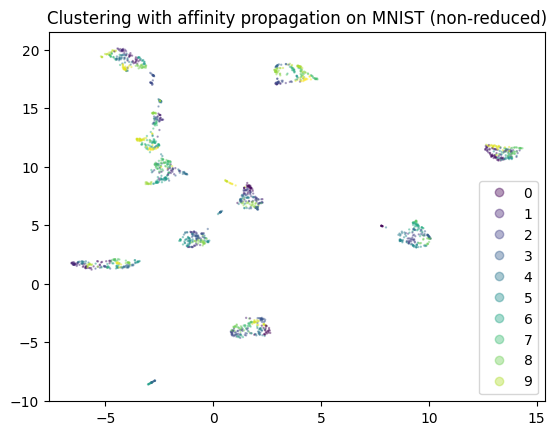

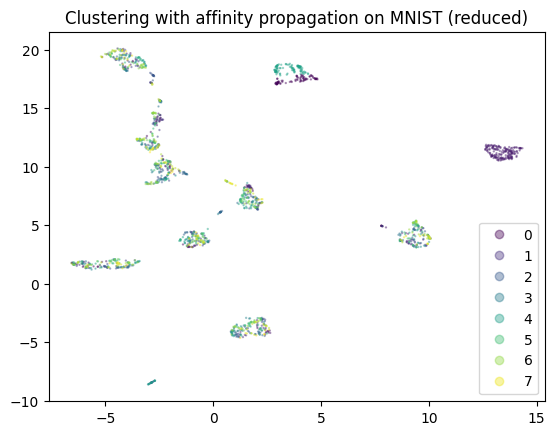

In [11]:
classes = ['0','1','2','3','4','5','6','7','8','9']
scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=pred_ap_nr,cmap='viridis')
plt.title("Clustering with affinity propagation on MNIST (non-reduced)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=pred_ap_r,cmap='viridis')
plt.title("Clustering with affinity propagation on MNIST (reduced)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

In [12]:
from sklearn.metrics import adjusted_rand_score
print(f'Adjusted rand score for affinity propagation on non-reduced MNIST: {adjusted_rand_score(y,pred_ap_nr)}')
print(f'Adjusted rand score for affinity propagation on umap-reduced MNIST: {adjusted_rand_score(y,pred_ap_r)}')

Adjusted rand score for affinity propagation on non-reduced MNIST: 0.17497696501025925
Adjusted rand score for affinity propagation on umap-reduced MNIST: 0.2366956034948578


## SpectralClustering on MNIST

In [13]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=10,eigen_solver='amg',assign_labels='discretize').fit(X)
pred_sc_nr = sc.labels_

sc = SpectralClustering(n_clusters=10,eigen_solver='amg',assign_labels='discretize').fit(red)
pred_sc_r = sc.labels_

/home/panopticon/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/panopticon/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 985 with accuracies 
[1.26337598e-06 4.90650060e-06 2.75939266e-06 2.39684632e-06
 4.78095559e-06 9.60184138e-06 6.32781343e-06 1.18247530e-05
 5.90981795e-06 9.84475424e-06 6.04622624e-05]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(


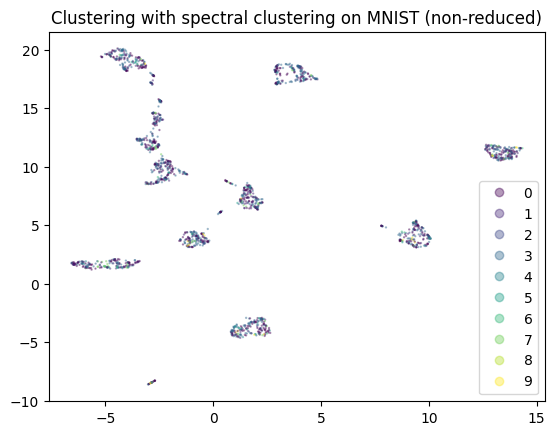

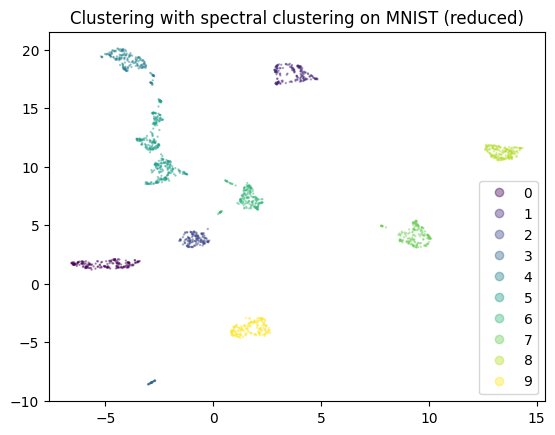

In [14]:
classes = ['0','1','2','3','4','5','6','7','8','9']
scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=pred_sc_nr,cmap='viridis')
plt.title("Clustering with spectral clustering on MNIST (non-reduced)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=pred_sc_r,cmap='viridis')
plt.title("Clustering with spectral clustering on MNIST (reduced)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

In [15]:
from sklearn.metrics import adjusted_rand_score
print(f'Adjusted rand score for spectral clustering on non-reduced MNIST: {adjusted_rand_score(y,pred_sc_nr)}')
print(f'Adjusted rand score for spectral clustering on umap-reduced MNIST: {adjusted_rand_score(y,pred_sc_r)}')

Adjusted rand score for spectral clustering on non-reduced MNIST: 0.0014376156397010403
Adjusted rand score for spectral clustering on umap-reduced MNIST: 0.8392898764544554


# Fashion-MNIST

In [5]:
# Import local dataset
import pandas as pd
import numpy as np
mnist_fashion_train = pd.read_csv('fashion-mnist_train.csv').to_numpy()
mnist_fashion_test = pd.read_csv('fashion-mnist_test.csv').to_numpy()
# Take 10% of the data since larger dataset lets the kernel crash
mnist_fashion_10 = np.concatenate((mnist_fashion_train,mnist_fashion_test),axis=0)
idx = np.random.randint(70000,size=7000)
mnist_fashion_10 = mnist_fashion_10[idx,:]
# Construct dataset
X = mnist_fashion_10[:,1:]
y = mnist_fashion_10[:,0]

In [6]:
# Apply kmeans to original MNIST
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(X)
pred_fashion_nr = kmeans.labels_

In [7]:
# Reduce dimensionality of MNIST to 2d for visualizing
import umap
reducer = umap.UMAP()
red = reducer.fit_transform(X)

2023-02-23 17:35:08.587912: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-23 17:35:08.650744: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-23 17:35:08.650755: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-23 17:35:09.026123: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

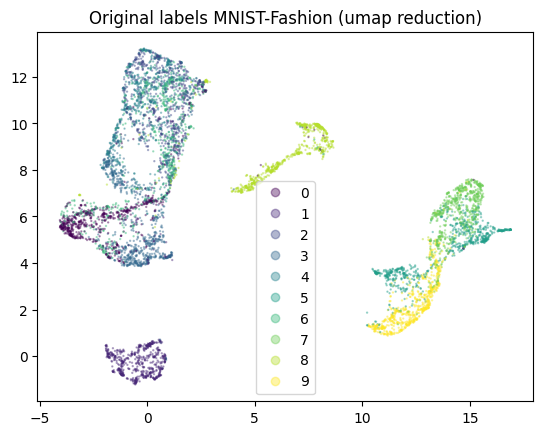

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors

classes = ['0','1','2','3','4','5','6','7','8','9']
scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=y,cmap='viridis')
plt.title("Original labels MNIST-Fashion (umap reduction)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

In [9]:
# Apply kmeans to reduced MNIST
kmeans = KMeans(n_clusters=10).fit(red)
pred_fashion_r = kmeans.labels_

## kmeans on MNIST-Fashion

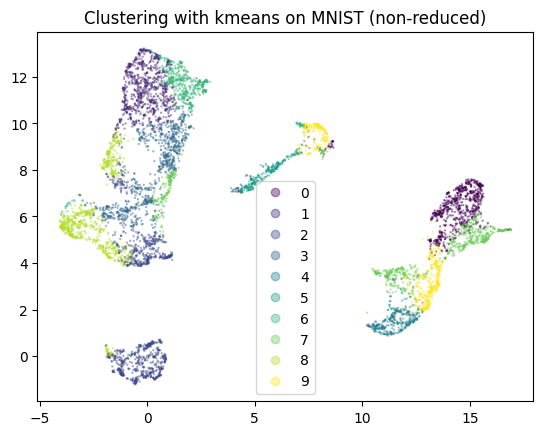

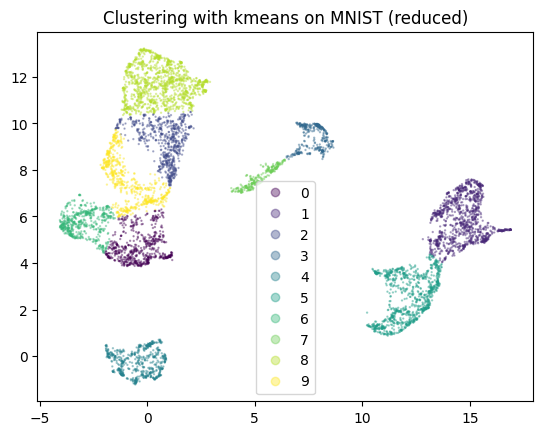

In [10]:
classes = ['0','1','2','3','4','5','6','7','8','9']
scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=pred_fashion_nr,cmap='viridis')
plt.title("Clustering with kmeans on MNIST (non-reduced)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=pred_fashion_r,cmap='viridis')
plt.title("Clustering with kmeans on MNIST (reduced)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

In [11]:
from sklearn.metrics import adjusted_rand_score
print(f'Adjusted rand score for kmeans on non-reduced MNIST: {adjusted_rand_score(y,pred_fashion_nr)}')
print(f'Adjusted rand score for kmeans on umap-reduced MNIST: {adjusted_rand_score(y,pred_fashion_r)}')

Adjusted rand score for kmeans on non-reduced MNIST: 0.347576673436983
Adjusted rand score for kmeans on umap-reduced MNIST: 0.45294472596958696


## AffinityPropagation on MNIST-Fashion

In [13]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation().fit(X)
pred_ap_nr = ap.labels_

ap = AffinityPropagation().fit(red)
pred_ap_r = ap.labels_

/home/panopticon/.local/lib/python3.10/site-packages/sklearn/cluster/_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


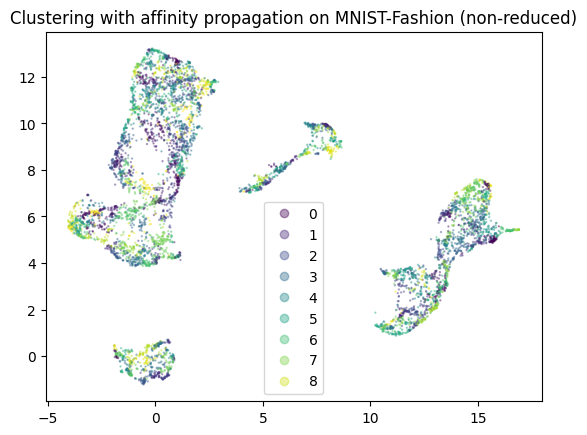

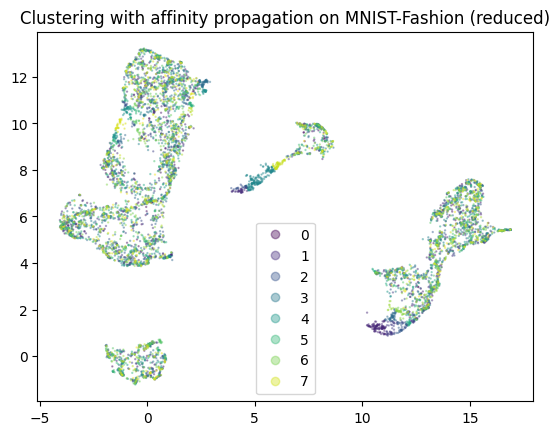

In [14]:
classes = ['0','1','2','3','4','5','6','7','8','9']
scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=pred_ap_nr,cmap='viridis')
plt.title("Clustering with affinity propagation on MNIST-Fashion (non-reduced)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=pred_ap_r,cmap='viridis')
plt.title("Clustering with affinity propagation on MNIST-Fashion (reduced)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

In [15]:
from sklearn.metrics import adjusted_rand_score
print(f'Adjusted rand score for affinity propagation on non-reduced MNIST-Fashion: {adjusted_rand_score(y,pred_ap_nr)}')
print(f'Adjusted rand score for affinity propagation on umap-reduced MNIST-Fashion: {adjusted_rand_score(y,pred_ap_r)}')

Adjusted rand score for affinity propagation on non-reduced MNIST-Fashion: 0.0607431264353958
Adjusted rand score for affinity propagation on umap-reduced MNIST-Fashion: 0.0180584229066056


In [16]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=10,eigen_solver='amg',assign_labels='discretize').fit(X)
pred_sc_nr = sc.labels_

sc = SpectralClustering(n_clusters=10,eigen_solver='amg',assign_labels='discretize').fit(red)
pred_sc_r = sc.labels_

/home/panopticon/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


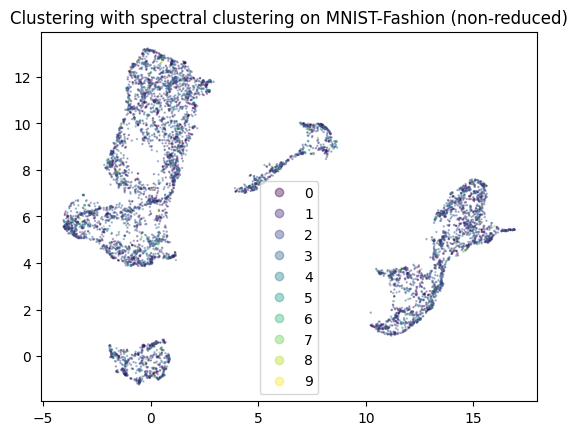

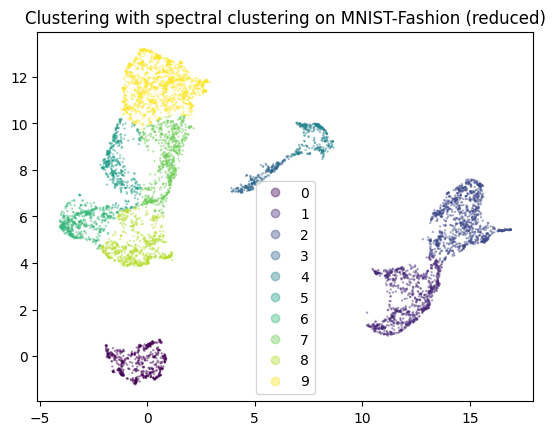

In [17]:
classes = ['0','1','2','3','4','5','6','7','8','9']
scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=pred_sc_nr,cmap='viridis')
plt.title("Clustering with spectral clustering on MNIST-Fashion (non-reduced)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

scatter = plt.scatter(red[:,0],red[:,1],s=0.5,alpha=0.4,c=pred_sc_r,cmap='viridis')
plt.title("Clustering with spectral clustering on MNIST-Fashion (reduced)")
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.show()

In [18]:
from sklearn.metrics import adjusted_rand_score
print(f'Adjusted rand score for spectral clustering on non-reduced MNIST: {adjusted_rand_score(y,pred_sc_nr)}')
print(f'Adjusted rand score for spectral clustering on umap-reduced MNIST: {adjusted_rand_score(y,pred_sc_r)}')

Adjusted rand score for spectral clustering on non-reduced MNIST: 0.0002203818200703453
Adjusted rand score for spectral clustering on umap-reduced MNIST: 0.4502699341163417
